# Quantum Dynamics

--- 

Quantum systems (for example, **qubits**: a two-level quantum system) evolve with time. The evolution of state $\ket{\psi}$ with time is provided by the **$2^{nd}$ Postulate** of Quantum Mechanics (QM). 

Note the word **Postulate**.  


![Pos2](Images/Pos2.png)

*(Picture extracted from Nielsen and Chuang, 2010)*

- This postulate of QM describes how quantum states of a closed quantum system at two
different times are related. So this postulate is referred to as the **discrete time evolution** of quantum states. 

- Notice the word **closed** in the postulate; closed here mens that system evolves with time on its own (due to its internal mechanics) and its not affected by the environment (anything other than itself); To describe dynamics of open systems we would require more tools, which we will briefly introduce later. This is in sync with what we had studied until now in the context of quantum computing (where quantum systems of interest are qubits). We saw different $U$'s like Hadamard, Pauli- gates, Toffoli, etc. 

But, a more refined version of this postulate describing the evolution of a quantum system in **continuous time** (as time is infact a continuous variable) is as follows: 

![Pos2prime](Images/Pos2prime.png)

*(Picture extracted from Nielsen and Chuang, 2010)*

This form of the postulate says, if we know the $H$ for the system, we can understand its **dynamics** ( $\ket{\psi(t)}$ for all $t$) completely (provided we have all necessary tools available to mankind to solve the above differential equation given any $H$)

#### Example: Consider flipping a qubit from state $\ket{0}$ to $\ket{1}$.

Let's say this operation is perfectly done, that is the state of the qubit after the operation becomes $\ket{1}$. The mathematical object that describes this transition is the Pauli-X gate as we already know. $ U \ket{0} = \sigma_x \ket{0} = \ket{1}$. Here we don't really care about the intermediate processess that the qubit state went through to get to the state $\ket{1}$. This is the first form of Postulate $2$ that relates the state of the qubits at two different times (initial time and final time). 

Let's understand the equivalence of this with the second form of the postulate. Qubits are **physical** $2$-level quantum systems. So transition of the qubit from state $\ket{0}$ to $\ket{1}$ essentially involves some physical mechanism (say using microwave pulses in context of superconducting qubits). So the system consisting of the qubit in state $\ket{0}$ and the action of pulse for some amount of time (say $t_0$), steers the qubit to the desired final state  $\ket{1}$ after time $t_0$. $H$ basically contains all the details that is responsible to evolve the initial state (here $\ket{0}$) to the final state (here $\ket{1}$). Let's say the pulse acted on the qubit from $t=0$ to $t=t_0$ and the qubit got flipped. Then it better be that the $H$ you write in $2.86$ (in the image) provides you a solution $\ket{\psi(t)}$ such that $\ket{\psi(t_0)}= \ket{1}$ and $\ket{\psi(0)}= \ket{0}$.




**The two forms of postulate $2$ are equivalent to one another:**

Let's solve the Schrodinger equation in $2.86$ for the evolution from time $t_1$ to time $t_2$. $2.86$ is a first order linear differential equation and solution can be easily written down as: 
\begin{equation}
\left|\psi\left(t_2\right)\right\rangle = \exp\left[\frac{-i}{\hbar}\int\limits_{t_1}^{t_2} H(t) \, \mathrm{d}t\right]\left|\psi\left(t_1\right)\right\rangle = \left[U\left(t_1, t_2\right)\right]\left|\psi\left(t_1\right)\right\rangle
\end{equation}

where we **define**
$$
U\left(t_1, t_2\right) \equiv \exp\left[\frac{-i}{\hbar}\int\limits_{t_1}^{t_2} H(t) \, \mathrm{d}t\right]
$$

$U\left(t_1, t_2\right)$ is called the **propagator.**

<font color='red'>**Thus we see a one-to-one correspondence between the discrete-time description (second equality in $1$)
of quantum state dynamics using unitary operators, and the continuous time description using Hamiltonians (first equality in $1$).**</font>

---

### What does the postulate above look like in the density matrix language? 

We already saw Postulate $2$ in $PS(09)$, let's put it again here:

If an initial arbitrary state $|\psi_j \rangle$ with probability of occurrence $p_j$ evolves into the state $\hat U|\psi_j \rangle$ after a unitary evolution, then the evolution of a density matrix, consisting of an ensemble of quantum states evovles as follows: 

$$ 
\rho = \sum_{j} p_j |\psi_j \rangle \langle \psi_j | \enspace \xrightarrow[]{\enspace \hat U \enspace} \enspace \rho' = \sum_{j} p_j \hat U |\psi_j \rangle \langle \psi_j | \hat U^{\dagger} = \hat U \rho \hat U^{\dagger}
$$

How does Postulate $2'$ look in the density matrix formalism? We have,

$$
i \hbar \frac{d}{dt}|\psi\rangle=H|\psi\rangle \quad \stackrel{\dagger}{\rightarrow} \quad -i \hbar \frac{\partial}{\partial t}\langle\psi|=\langle\psi| H .
$$

where the second expression is obtained by taking the adjoint (dagger) of the first. Note that $H$ is Hermitian ($H^\dagger=H$)

We differentiate the density matrix of a mixed state with respect to time and multiply it by $i \hbar$.

$$
i \hbar \frac{d}{dt} \rho = i \hbar \sum_{j} p_{j} \left(|\dot{\psi}_{j}\rangle \langle\psi_{j}| + |\psi_{j}\rangle \langle\dot{\psi}_{j}|\right)
$$
(product rule of differentiation had been used to get to the second expression)

Using the Schrodinger equation, this simplifies to the **von Neumaann equation**, **$$i \hbar \frac{d}{dt} \rho = [H,\rho]$$** 


where $$[H,\rho]= H\rho-\rho H$$

Again, the state dynamics ($\rho(t)$ for all $t$) is determined if the von Neumann equation is solved given $H$. 




---

### Simulating dynamics of closed quantum systems:

By now, we are well versed with the differential equation governing dynamics of $\ket{\psi}$ and equivalently $\rho$. We can use any of these for simulating closed (pure) quantum systems but for open systems we mandatorily have to use $\rho(t)$.

Simulating dynamics here refers to modelling the behaviour of $\ket{\psi(t)}$ (or $\rho (t)$) for various $t$ and study how the state of quantum system evolves with time. 

QuTiP provides many ways to model dynamics. We'll try out some.

##### **The solver.Result Class**

QuTiP has a data structure used for returning critical data from the simulation results. 
Its useful to have a look at it [here](https://qutip.readthedocs.io/en/qutip-5.0.x/guide/dynamics/dynamics-data.html#the-solver-result-class) for more details. 

![solver](Images/resultclass.png)

(taken from QuTiP documentation)



**Example: $\ket{+}$ qubit state dynamics due to the Hamiltonian $H=\sigma_x$**

In [1]:
import numpy as np
import qutip
from qutip import basis, sigmax, SESolver, sigmaz

H = sigmax()  #define the hamiltonian used to evolve the states (here the hamiltonian is just Pauli-X)
a = 1/(np.sqrt(2))
psi0 = (a*qutip.basis(2, 0) + (a)*qutip.basis(2, 1)) # initial state
times = np.linspace(0.0, 1.0, 20)   # evolution time slices
solver = SESolver(H)
result = solver.run(psi0, times)
result.states    # returns |psi(t)> for t in times, so y 

# its useful to go inside the in-built methods here to see what it has to offer

[Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
 Qobj data =
 [[0.70710678]
  [0.70710678]],
 Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
 Qobj data =
 [[0.70612764-0.03719885j]
  [0.70612764-0.03719885j]],
 Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
 Qobj data =
 [[0.70319292-0.07429479j]
  [0.70319292-0.07429479j]],
 Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
 Qobj data =
 [[0.69831075-0.11118498j]
  [0.69831075-0.11118498j]],
 Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
 Qobj data =
 [[0.69149464-0.14776726j]
  [0.69149464-0.14776726j]],
 Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
 Qobj data =
 [[0.68276347-0.18394031j]
  [0.68276347-0.18394031j]],
 Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
 Qobj data =
 [[0.67214143-0.21960395j]
  [0.67214143-0.21960395j]],
 Quantum object: dims=[[2], [1]], sha

#### How is this simulation done?

The state has been evolved from $t_i=0$ to $t_f=1$ in $n=20$ time steps. Notice the specified times slices (or discrete time steps '$dt$') in the code. It is $dt=\frac{t_f}{n}=\frac{1}{20}$. 

So, first evolution is $\ket{\psi(dt)}= e^{-i\sigma_x dt}\ket{+}$. 

Continuing the evolution, $\ket{\psi(2dt)}= e^{-i\sigma_x dt}e^{-i\sigma_x dt}\ket{+}= (e^{-i\sigma_x dt})^{2}\ket{+}$ and so on till our final time slice,  

$\ket{\psi(20dt)}= (e^{-i\sigma_x dt})^{20} \ket{+}= (e^{-i\sigma_x \frac{1}{20}})^{20}\ket{+} = e^{-i}\ket{+}$. This is the state at $t=20dt=1$.


##### Verifying theoretically 

The results from the simulation can be verified as follows:

$$H= \sigma_x    ,     \ket{\psi_0}=\ket{+}$$
Now, $\ket{\psi(t)}= e^{-i\sigma_x t}\ket{+}=e^{-it}\ket{+}$
(since $\ket{+}$ is an eigenstate of $\sigma_x$ with eigenvalue +1)
You should get the same result if you taylor expand $e^{-i\sigma_x t}$ and then act it on $\ket{+}$.
(see attached image below)

**Note:** Here we used the solution of Schrodinger equation we saw above, and thus due to equivalence $U(t)=e^{-it}$

![PlusStateEvolved](Images/sigmaX+.png)



So here the evolved state differs from the initial state by only a global phase and hence they are essentially the same quantum states (or vectors) on the Bloch sphere, as you can see by running the below code, the vector doesn't change with time evolution under the given $H$.  

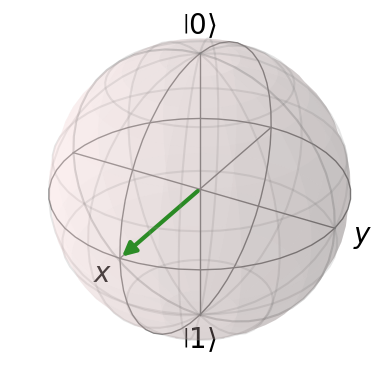

In [2]:
from matplotlib import pyplot as plt, animation
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # Create 3D subplot
sphere = qutip.Bloch(axes=ax)

def animate(i):
    sphere.clear()
    sphere.add_states(result.states[i])
    sphere.make_sphere()
    return sphere

def init():
    sphere.vector_color = ['r']
    return sphere

ani = animation.FuncAnimation(fig, animate, np.arange(len(times)),
                              init_func=init, blit=False, repeat=False)

ani.save('b_sPauliXPlus.gif', writer='pillow', fps=20)

#(the state in the bloch sphere displayed is the final state, here at t=1)
# to run the animation you need to run the saved .gif file, 
# here you won't experience the vector moving with time as the qubit state  is not changing with time 

<font color='red'>**Exercise 4:**  Explicitly solve the differential equation $
i \hbar \frac{d}{dt}|\psi\rangle=H|\psi\rangle$ for $H=\sigma_x$ with initial condition $\ket{\psi(0)}=\ket{+}$ and check whether you get the same result as above </font>

Hence **given** $H=\sigma_x$ we were able to find $U=e^{-it}$. This is not always that easy.


<font color='yellow'>***Given a $H$ if we are able to construct $U$ then we can use $U$ as gates in a quantum circuit. Thus quantum computers can be used to simulate quantum systems. (note: $H$ governs the dynamics of quantum systems, thanks to Postulate 2)***</font>

**Conceptual illustration of a universal simulator implemented on a digital quantum computing device**

![QSIM](Images/Qsim.png)

(Tacchino et al., 2020)- *This is a nice review paper on Quantum simulation.*


Notice that we always started off saying, **given $H$** that governs dynamics of quantum systems, but finding the $H$ of real world quantum systems is not that easy. $H$
should contain all dynamical information necessary
to describe and characterize the physical quantum system
under investigation.


Also notice, as the dimension of $H$ grows bigger (simulating more number qubits, say), it becomes extremely hard to exponentiate $H$ and thus construct quantum circuits to simulate such dynamics.

**Another Example: $\ket{0}$ state dynamics due to the Hamiltonian $H=\sigma_x$**

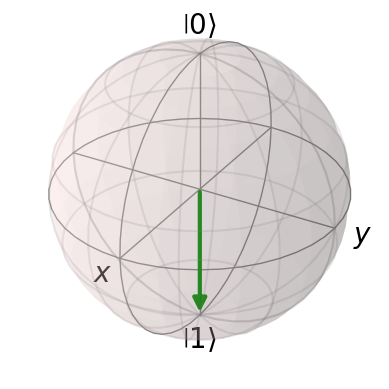

In [4]:

H = sigmax()  #define the hamiltonian used to evolve the states (here the hamiltonian is just Pauli-X)
a = 1
psi0 = (a*qutip.basis(2, 0) + (1-a)*qutip.basis(2, 1)) # initial state
times = np.linspace(0.0, np.pi/2, 10)  # evolving till t=pi/2, as from theoretical calculation below we see that at t=pi/2 state gets flipped with a phase
solver = SESolver(H)
result = solver.run(psi0, times)
result.states    # returns |psi(t)> for t in times, so y 

from matplotlib import pyplot as plt, animation
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # Create 3D subplot
sphere = qutip.Bloch(axes=ax)

def animate(i):
    sphere.clear()
    sphere.add_states(result.states[i])
    sphere.make_sphere()
    return sphere

def init():
    sphere.vector_color = ['r']
    return sphere

ani = animation.FuncAnimation(fig, animate, np.arange(len(times)),
                              init_func=init, blit=False, repeat=False)

ani.save('b_sPauliXZero.gif', writer='pillow', fps=20)

#### Theoretical calculation:

![PlusState](Images/sigmaX0.png)

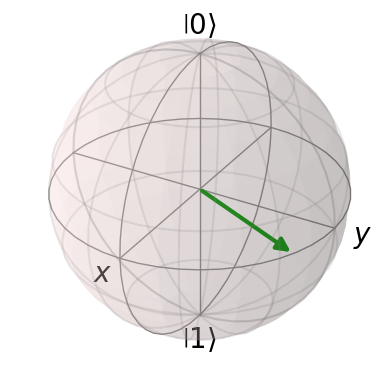

In [7]:

H = sigmaz()  #define the hamiltonian used to evolve the states (here the hamiltonian is just Pauli-Z)
a = 1/np.sqrt(2)
psi0 = (a*qutip.basis(2, 0) + (a)*qutip.basis(2, 1)) # initial state
times = np.linspace(0.0, 10, 1000)  # evolving till t=10 and 1000 steps, might take a minute or two to generate the animation
solver = SESolver(H)
result = solver.run(psi0, times)
result.states    # returns |psi(t)> for t in times, so y 

from matplotlib import pyplot as plt, animation
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # Create 3D subplot
sphere = qutip.Bloch(axes=ax)

def animate(i):
    sphere.clear()
    sphere.add_states(result.states[i])
    sphere.make_sphere()
    return sphere

def init():
    sphere.vector_color = ['r']
    return sphere

ani = animation.FuncAnimation(fig, animate, np.arange(len(times)),
                              init_func=init, blit=False, repeat=False)

ani.save('PlusStateForPauliZ.gif', writer='pillow', fps=20)

#play the .gif file saved, the figure below is the display of the final state

#### References: 

- QuTiP library Documentation. Can be found at https://qutip.readthedocs.io/en/qutip-5.0.x/index.html
- Tacchino et al. (2020). Quantum computers as universal quantum simulators: state-of-art and perspectives. Accessed at https://arxiv.org/abs/1907.03505
- Nielsen, M. A., & Chuang, I. L. (2010). Quantum Computation and Quantum Information: 10th Anniversary Edition. Cambridge: Cambridge University Press.